In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('drive/My Drive/Task 3/')


In [4]:
ls

'Animals Dataset'/                 inception.pth
 dataset_attr_animals.csv          inceptionreagain_animals.pth
 dataset_attr.csv                  resnet_animals.pth
'Habitats Dataset'/                testdata_animals.csv
 inception_animals.pth             testdata.csv
 inception_freeze_animals_1.pth    traineddata_animals.csv
 inception_freeze_animals.pth      traineddata.csv
 inception_freeze_habitats_1.pth  'Val Animals'/
 inception_freeze_habitats.pth    'Val Habitats'/
 inception_habitats.pth


In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
  
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!pip install torch torchvision


tcmalloc: large alloc 1073750016 bytes == 0x581f8000 @  0x7f4c6c3332a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 5.6MB 6.2MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully

In [5]:
# import required libraries
import os
import re
import torch
import csv
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import shuffle
from PIL import Image


def create_meta_csv(dataset_path, destination_path):
    
    """Create a meta csv file given a dataset folder path of images.

    This function creates and saves a meta csv file named 'dataset_attr.csv' given a dataset folder path of images.
    The file will contain images and their labels. This file can be then used to make
    train, test and val splits, randomize them and load few of them (a mini-batch) in memory
    as required. The file is saved in dataset_path folder if destination_path is not provided.

    The purpose behind creating this file is to allow loading of images on demand as required. Only those images required are loaded randomly but on demand using their paths.
    
    Args:
        dataset_path (str): Path to dataset folder
        destination_path (str): Destination to store meta file if None provided, it'll store file in dataset_path

    Returns:
        True (bool): Returns True if 'dataset_attr.csv' was created successfully else returns an exception
    """

    # Change dataset path accordingly
    dataset_path = ""
    DATASET_PATH = os.path.abspath(dataset_path)

    if not os.path.exists(os.path.join(DATASET_PATH, "/dataset_attr_animals.csv")):

        # Make a csv with full file path and labels
        with open('dataset_attr_animals.csv','w',newline="") as fp:
            SEPARATOR = ","
            a = csv.writer(fp,delimiter=SEPARATOR)
            data = [['Animals_Dataset_Path', 'Label']]
            a.writerows(data)
            for dirname, dirnames, filenames in os.walk('Animals Dataset'):
                for subdirname in dirnames:
                    subject_path = os.path.join(dirname, subdirname)
                    for filename in os.listdir(subject_path):
                        abs_path = "%s/%s" % (subject_path, filename)
                        if(re.search("arctic fox", abs_path)):
                            label = "arctic fox"
                        elif(re.search("bear", abs_path)):
                            label = "bear"
                        elif(re.search("bee", abs_path)):
                            label = "bee"
                        elif(re.search("butterfly", abs_path)):
                            label = "butterfly"
                        elif(re.search("cat", abs_path)):
                            label = "cat"
                        elif(re.search("cougar", abs_path)):
                            label = "cougar"
                        elif(re.search("cow", abs_path)):
                            label = "cow"
                        elif(re.search("coyote", abs_path)):
                            label = "coyote"
                        elif(re.search("crab", abs_path)):
                            label = "crab"
                        elif(re.search("crocodile", abs_path)):
                            label = "crocodile"
                        elif(re.search("deer", abs_path)):
                            label = "deer"
                        elif(re.search("dog", abs_path)):
                            label = "dog"
                        elif(re.search("eagle", abs_path)):
                            label = "eagle"
                        elif(re.search("elephant", abs_path)):
                            label = "elephant"
                        elif(re.search("fish", abs_path)):
                            label = "fish"
                        elif(re.search("frog", abs_path)):
                            label = "frog"
                        elif(re.search("giraffe", abs_path)):
                            label = "giraffe"
                        elif(re.search("goat", abs_path)):
                            label = "goat"
                        elif(re.search("hippo", abs_path)):
                            label = "hippo"
                        elif(re.search("horse", abs_path)):
                            label = "horse"
                        elif(re.search("kangaroo", abs_path)):
                            label = "kangaroo"
                        elif(re.search("lion", abs_path)):
                            label = "lion"
                        elif(re.search("monkey", abs_path)):
                            label = "monkey"
                        elif(re.search("otter", abs_path)):
                            label = "otter"
                        elif(re.search("panda", abs_path)):
                            label = "panda"
                        elif(re.search("parrot", abs_path)):
                            label = "parrot"
                        elif(re.search("penguin", abs_path)):
                            label = "penguin"
                        elif(re.search("raccoon", abs_path)):
                            label = "raccoon"
                        elif(re.search("rat", abs_path)):
                            label = "rat"
                        elif(re.search("seal", abs_path)):
                            label = "seal"
                        elif(re.search("shark", abs_path)):
                            label = "shark"
                        elif(re.search("sheep", abs_path)):
                            label = "sheep"
                        elif(re.search("skunk", abs_path)):
                            label = "skunk"
                        elif(re.search("snake", abs_path)):
                            label = "snake"
                        elif(re.search("snow leopard", abs_path)):
                            label = "snow leopard"
                        elif(re.search("tiger", abs_path)):
                            label = "tiger"
                        elif(re.search("yak", abs_path)):
                            label = "yak"
                        else:
                            label = "zebra"

                        data = [[abs_path, label]]
                        a.writerows(data)

            # change destination_path to DATASET_PATH if destination_path is None 
            if destination_path == None:
                destination_path = dataset_path

            # write out as dataset_attr.csv in destination_path directory

            # if no error
            return True

def create_and_load_meta_csv_df(dataset_path, destination_path, randomize=True, split=None):
    """Create a meta csv file given a dataset folder path of images and loads it as a pandas dataframe.

    This function creates and saves a meta csv file named 'dataset_attr.csv' given a dataset folder path of images.
    The file will contain images and their labels. This file can be then used to make
    train, test and val splits, randomize them and load few of them (a mini-batch) in memory
    as required. The file is saved in dataset_path folder if destination_path is not provided.

    The function will return pandas dataframes for the csv and also train and test splits if you specify a 
    fraction in split parameter.
    
    Args:
        dataset_path (str): Path to dataset folder
        destination_path (str): Destination to store meta csv file
        randomize (bool, optional): Randomize the csv records. Defaults to True
        split (double, optional): Percentage of train records. Defaults to None

    Returns:
        dframe (pandas.Dataframe): Returns a single Dataframe for csv if split is none, else returns more two Dataframes for train and test splits.
        train_set (pandas.Dataframe): Returns a Dataframe of length (split) * len(dframe)
        test_set (pandas.Dataframe): Returns a Dataframe of length (1 - split) * len(dframe)
    """
    if create_meta_csv(dataset_path, destination_path=destination_path):
        dframe = pd.read_csv(os.path.join("", 'dataset_attr_animals.csv'))

    # shuffle if randomize is True or if split specified and randomize is not specified 
    # so default behavior is split
    if randomize == True or (split != None and randomize == None):
        
        dframe = shuffle(dframe)
        pass 

    if split != None:
        train_set, test_set = train_test_split(dframe, split)
        return dframe, train_set, test_set 
    
    return dframe

def train_test_split(dframe, split_ratio):
    """Splits the dataframe into train and test subset dataframes.

    Args:
        split_ration (float): Divides dframe into two splits.

    Returns:
        train_data (pandas.Dataframe): Returns a Dataframe of length (split_ratio) * len(dframe)
        test_data (pandas.Dataframe): Returns a Dataframe of length (1 - split_ratio) * len(dframe)
    """
    # divide into train and test dataframes
    train_data  = dframe.iloc[0:int(len(dframe)*split_ratio),:]
    test_data = dframe.iloc[len(dframe)-(len(dframe)-len(train_data)):,:]
    return train_data, test_data



class ImageDataset(Dataset):
    """Image Dataset that works with images
    
    This class inherits from torch.utils.data.Dataset and will be used inside torch.utils.data.DataLoader
    Args:
        data (str): Dataframe with path and label of images.
        transform (torchvision.transforms.Compose, optional): Transform to be applied on a sample. Defaults to None.
    
    Examples:
        >>> df, train_df, test_df = create_and_load_meta_csv_df(dataset_path, destination_path, randomize=randomize, split=0.99)
        >>> train_dataset = dataset.ImageDataset(train_df)
        >>> test_dataset = dataset.ImageDataset(test_df, transform=...)
    """
    
    def __init__(self, data,transform):
    
        self.data = data
        self.transform = transform
        print(self.transform)
        #self.classes = ['baseball','basketball court','beach','circular farm','cloud','commercial area','dense residential','desert','forest','golf course','harbor','island','lake','meadow','medium residential area','mountain','rectangular farm','river','sea glacier','shrubs','snowberg','sparse residential area','thermal power station','wetland']
        self.classes=['arctic fox','bear','bee','butterfly','cat','cougar','cow','coyote','crab','crocodile','deer','dog','eagle','elephant','fish','frog','giraffe','goat','hippo','horse','kangaroo','lion','monkey','otter','panda','parrot','penguin','raccoon','rat','seal','shark','sheep','skunk','snake','snow leopard','tiger','yak','zebra']

    def __len__(self):
        print(len(self.data))
        return len(self.data)

    def __getitem__(self, idx):

        img_path=self.data.iloc[idx]['Animals_Dataset_Path']
        image = Image.open(img_path)
        image = image.convert('RGB')
        #image= image[:,:,:3]
        label = self.classes.index(self.data.iloc[idx]['Label'])
        
        
        if self.transform:
            image = self.transform(image)

        return (image, label)


if __name__ == "__main__":
    # test config
    dataset_path = '../Animals Dataset'
    dest = '../Animals Dataset'
    classes = 38
    total_rows = 5000
    randomize = True
    clear = True
    
    # test_create_meta_csv()
    df, trn_df, tst_df = create_and_load_meta_csv_df(dataset_path, destination_path=dest, randomize=randomize, split=0.8)
    expor_csv = trn_df.to_csv(r'traineddata_animals.csv',header=True,index=True)
    export_csv = tst_df.to_csv(r'testdata_animals.csv',header=True,index=True)


    print(df.describe())
    print(trn_df.describe())
    print(tst_df.describe())



                          Animals_Dataset_Path     Label
count                                     4187      4187
unique                                    4187        38
top     Animals Dataset/parrot/Parrot (88).jpg  kangaroo
freq                                         1       151
                          Animals_Dataset_Path     Label
count                                     3349      3349
unique                                    3349        38
top     Animals Dataset/parrot/Parrot (88).jpg  kangaroo
freq                                         1       124
                                 Animals_Dataset_Path Label
count                                             838   838
unique                                            838    38
top     Animals Dataset/crocodile/crocodile (134).jpg   rat
freq                                                1    36


In [6]:
# loading dataframes using dataset module 
df, df_train, df_test = create_and_load_meta_csv_df(dataset_path='../Animals Dataset', destination_path='../Animals Dataset', randomize=True, split=0.8)
expor_csv = df_train.to_csv(r'traineddata_animals.csv',header=True,index=True)
export_csv = df_test.to_csv(r'testdata_animals.csv',header=True,index=True)


print(df.describe())
print(df_train.describe())
print(df_test.describe())
df1={'train':df_train,
      'val':df_test}

                          Animals_Dataset_Path     Label
count                                     4187      4187
unique                                    4187        38
top     Animals Dataset/parrot/Parrot (88).jpg  kangaroo
freq                                         1       151
                          Animals_Dataset_Path   Label
count                                     3349    3349
unique                                    3349      38
top     Animals Dataset/parrot/Parrot (88).jpg  monkey
freq                                         1     118
                     Animals_Dataset_Path      Label
count                                 838        838
unique                                838         38
top     Animals Dataset/elephant/5629.jpg  crocodile
freq                                    1         35


In [0]:
data_transforms = {
    'train': transforms.Compose([
         transforms.Resize(360),
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        #transforms.Normalize([123.68, 116.779, 103.939],[1, 1, 1])
        transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
       #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(360),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
                #transforms.Normalize([123.68, 116.779, 103.939],[1, 1, 1])
        transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [8]:

image_datasets = {x: ImageDataset(df1[x], data_transforms[x])

                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True,num_workers=10)
               for x in ['train', 'val']}
class_names=image_datasets['train'].classes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
expor_csv = df_train.to_csv(r'traineddata.csv',header=True,index=True)
export_csv = df_test.to_csv(r'testdata.csv',header=True,index=True)

Compose(
    Resize(size=360, interpolation=PIL.Image.BILINEAR)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)
Compose(
    Resize(size=360, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)
3349
838


3349
tensor([14, 36, 24, 24, 35,  0, 20, 26,  8, 35, 24, 22, 13, 27, 35,  9, 14, 12,
        36,  8,  0,  2, 28, 27, 24, 14, 35, 17, 28,  5,  2,  4])


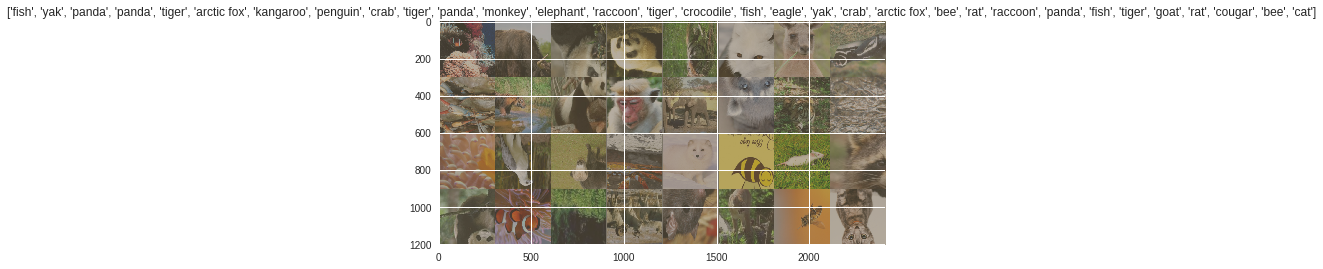

In [9]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    #mean = np.array([1, 1, 1])
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(classes.data)

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow((out), title=[class_names[x] for x in classes])

In [0]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(preds.data)
            print(labels.data)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far ==num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [0]:
def train1_model(model, criterion, optimizer,scheduler, num_epochs=50):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train','val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    #print('predicted',preds)
                    #print('actual',labels)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights\\
    torch.save(model.state_dict(best_model_wts),'animals.pth')
    model.load_state_dict(best_model_wts)
    return model

In [16]:
model_conv2 = torchvision.models.inception_v3(pretrained=True)
model_conv2.aux_logits=False
print(model_conv2)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [17]:
#for i, param in model_conv2.named_parameters():
 #   param.requires_grad = False

    
print("[Inception: Freezing layers only till layer1 including]")
#ct = []
#for name, child in model_conv2.named_children():
 #   if "Conv2d_3b_1x1" in ct:
  #      for params in child.parameters():
   #         params.requires_grad = True
    #ct.append(name)


num_ftrs = model_conv2.fc.in_features
model_conv2.fc = nn.Linear(num_ftrs, 38)
model_conv2 = model_conv2.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_conv2.parameters(), lr=0.005, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

[Inception: Freezing layers only till layer1 including]


In [18]:
model_conv2 = train1_model(model_conv2, criterion, optimizer_ft,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 1.7852 Acc: 0.5885
838
val Loss: 0.2936 Acc: 0.9320

Epoch 1/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.6648 Acc: 0.8170
838
val Loss: 0.2368 Acc: 0.9308

Epoch 2/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.5467 Acc: 0.8429
838
val Loss: 0.2713 Acc: 0.9236

Epoch 3/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.4728 Acc: 0.8632
838
val Loss: 0.3479 Acc: 0.8938

Epoch 4/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.4825 Acc: 0.8647
838
val Loss: 0.1684 Acc: 0.9499

Epoch 5/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.4425 Acc: 0.8710
838
val Loss: 0.1975 Acc: 0.9475

Epoch 6/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.3926 Acc: 0.8913
838
val Loss: 0.1568 Acc: 0.9582

Epoch 7/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.3148 Acc: 0.9143
838
val Loss: 0.1216 Acc: 0.9690

Epoch 8/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2878 Acc: 0.9188
838
val Loss: 0.1117 Acc: 0.9737

Epoch 9/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2793 Acc: 0.9176
838
val Loss: 0.0981 Acc: 0.9773

Epoch 10/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2652 Acc: 0.9236
838
val Loss: 0.0950 Acc: 0.9773

Epoch 11/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2506 Acc: 0.9322
838
val Loss: 0.0917 Acc: 0.9761

Epoch 12/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2222 Acc: 0.9367
838
val Loss: 0.0849 Acc: 0.9761

Epoch 13/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2280 Acc: 0.9376
838
val Loss: 0.0886 Acc: 0.9726

Epoch 14/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2074 Acc: 0.9391
838
val Loss: 0.0868 Acc: 0.9737

Epoch 15/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2159 Acc: 0.9385
838
val Loss: 0.0867 Acc: 0.9737

Epoch 16/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2113 Acc: 0.9400
838
val Loss: 0.0845 Acc: 0.9761

Epoch 17/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2132 Acc: 0.9427
838
val Loss: 0.0860 Acc: 0.9737

Epoch 18/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2173 Acc: 0.9397
838
val Loss: 0.0872 Acc: 0.9749

Epoch 19/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2183 Acc: 0.9355
838
val Loss: 0.0831 Acc: 0.9749

Epoch 20/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2149 Acc: 0.9370
838
val Loss: 0.0854 Acc: 0.9773

Epoch 21/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2095 Acc: 0.9415
838
val Loss: 0.0811 Acc: 0.9773

Epoch 22/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2013 Acc: 0.9474
838
val Loss: 0.0844 Acc: 0.9749

Epoch 23/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.1895 Acc: 0.9457
838
val Loss: 0.0848 Acc: 0.9773

Epoch 24/24
----------
3349


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:953: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


train Loss: 0.2084 Acc: 0.9412
838
val Loss: 0.0849 Acc: 0.9737

Training complete in 111m 47s
Best val Acc: 0.977327


838
tensor([18, 37, 27, 12,  3, 27,  2,  3, 32, 36, 15, 35,  9, 10, 34, 20,  3, 30,
        23, 29, 26, 30, 34, 35, 24,  7,  2, 23, 21, 33, 27, 21],
       device='cuda:0')
tensor([18, 37, 27, 12,  3, 27,  2,  3, 32, 36, 15, 35,  9, 10, 34, 20,  3, 30,
        23, 29, 26, 30, 34, 35, 24,  7,  2, 23, 21, 33, 27, 21],
       device='cuda:0')


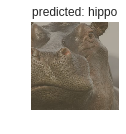

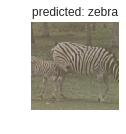

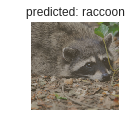

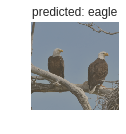

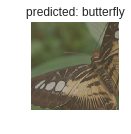

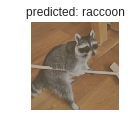

In [19]:
visualize_model(model_conv2)